In [31]:
import pandas as pd
import numpy as np
# --------------------------------- 读取1-1csv --------------------------------- #
df=pd.read_csv(r'轨迹数据集2\1-1.csv',usecols = ['track_id','type'])
df_grouped=df.groupby(df.type).nunique()
df_grouped.head()
# --------------------------------- 读取1-2csv --------------------------------- #
df2=pd.read_csv(r'轨迹数据集2\1-2.csv',usecols = ['track_id','type'])
df_grouped2=df2.groupby(df2.type).nunique()
df_grouped2.head()
# ----------------------------------- 集计与合并 ---------------------------------- #
print('车辆数量1：',len(df.track_id.unique()))
print('车辆数量2：',len(df2.track_id.unique()))

print(df_grouped)
print(df_grouped2)
df_grouped=df_grouped.add(df_grouped2)
print(df_grouped)

total_count = df_grouped['track_id'].sum()
df_grouped['distribution_ratio'] = df_grouped['track_id'] / total_count


车辆数量1： 12185
车辆数量2： 8258
                track_id
type                    
Bus                   78
Car                11854
Heavy Vehicle         13
Medium Vehicle       240
                track_id
type                    
Bus                   37
Car                 7931
Heavy Vehicle         12
Medium Vehicle       278
                track_id
type                    
Bus                  115
Car                19785
Heavy Vehicle         25
Medium Vehicle       518


In [32]:
print('车辆总数：',len(df.track_id.unique())+len(df2.track_id.unique()))
if 'track_id' in df_grouped.columns:
    df_grouped.rename(columns={'track_id':'track_id_cnt'},inplace=True)
print(df_grouped)

车辆总数： 20443
                track_id_cnt  distribution_ratio
type                                            
Bus                      115            0.005625
Car                    19785            0.967813
Heavy Vehicle             25            0.001223
Medium Vehicle           518            0.025339


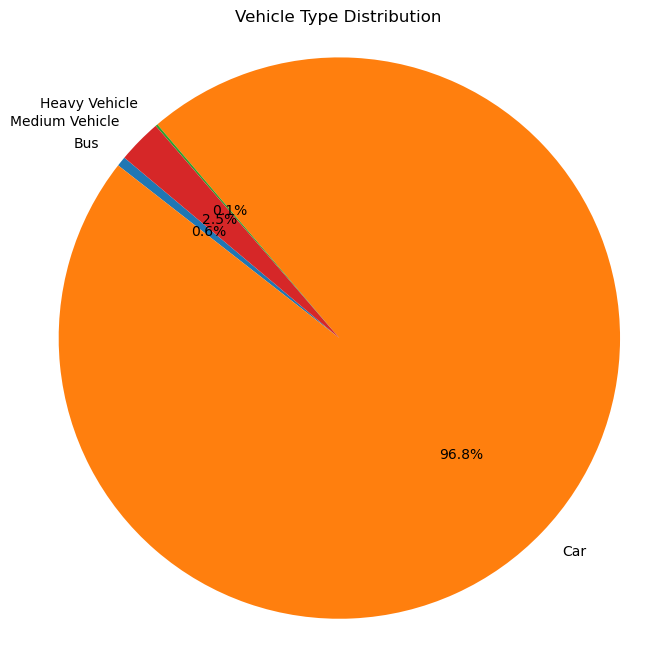

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(df_grouped.track_id_cnt, labels=df_grouped.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # 使饼图长宽相等，保证圆形
plt.title('Vehicle Type Distribution')



plt.show()
